In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [7]:
# object data
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [9]:
def convert_date_to_num():
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df.drop('Date', axis=1, inplace=True)
    return df

df = convert_date_to_num()

In [10]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [11]:
df.shape

(145460, 25)

In [12]:
for col in df.columns:
    if df[col].dtype != 'object':
      print(col,df[col].isna().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
day 0
month 0
year 0


In [13]:
# fill all missing values in numerical data with median
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)

In [14]:
df.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566
WindDir3pm,4228


In [15]:
# fill all null values in categorical data with most frequent
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
df.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


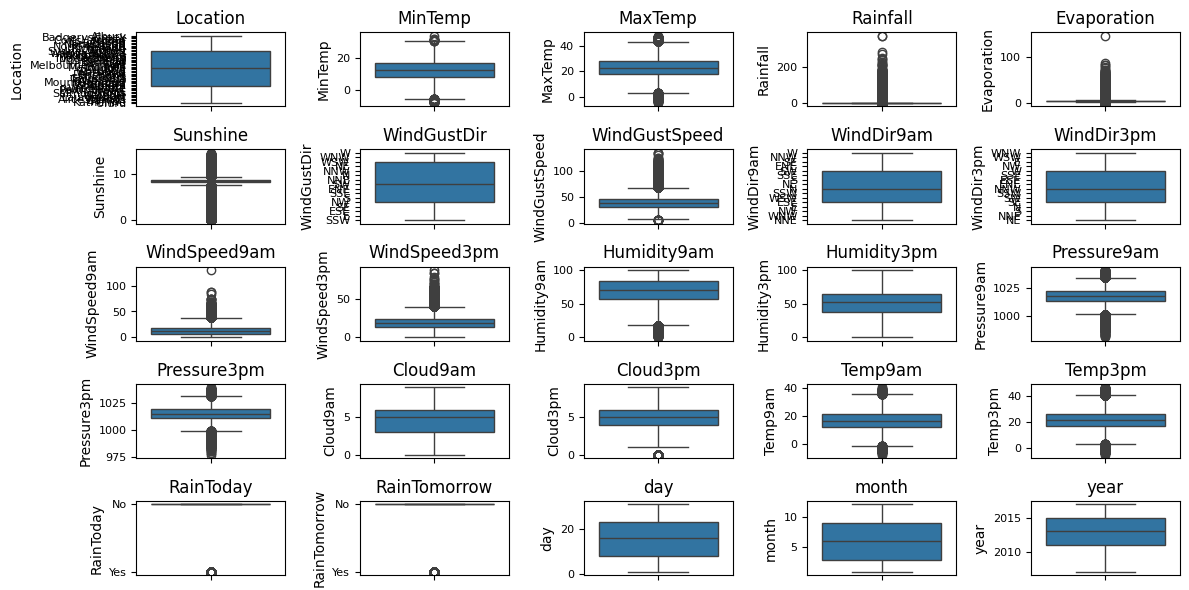

In [17]:
fig, axes = plt.subplots(5, 5, figsize=(12, 6))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

In [18]:
# remove outliars
for col in df.columns:
    if df[col].dtype != 'object':
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      IQR = q3 - q1
      lower_bound = q1 - 3 * IQR
      upper_bound = q3 + 3 * IQR
      # any value greater than upper_bound or less than lower_bound will replace it by meadian else will not change
      df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])

In [19]:
df.shape

(145460, 25)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

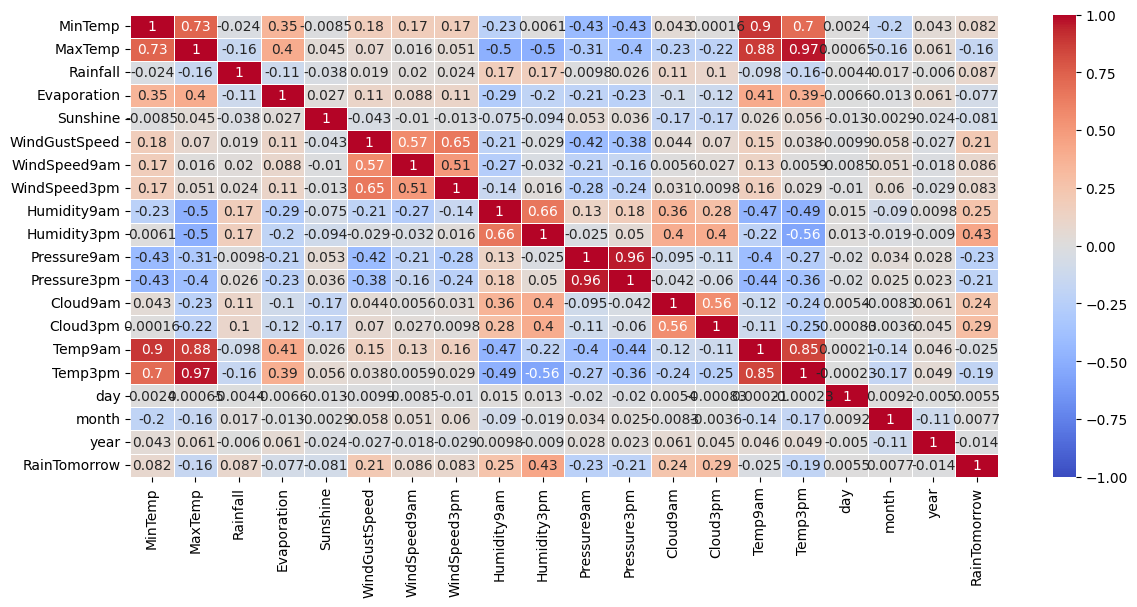

In [21]:
selected_columns = []
for col in df.columns:
    if df[col].dtype != 'object':
        selected_columns.append(col)

x = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
df['RainTomorrow'] = x

selected_columns.append('RainTomorrow')

df_selected = df[selected_columns]

corr_matrix = df_selected.corr()

plt.figure(figsize=(14, 6))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

plt.show()

In [22]:
for col in df.columns:
    if df[col].dtype == 'object':
      x = pd.get_dummies(df[col], drop_first=True, dtype=int, prefix=col)
      df = pd.concat([df, x], axis=1)
      df.drop(col, axis=1, inplace=True)

In [23]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

clf = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
        },
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1)

clf.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [28]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.8463237548778254
LogisticRegression(C=0.01, solver='liblinear')


In [29]:
best_clf = clf.best_estimator_
y_pred = best_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.73      0.50      0.59      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



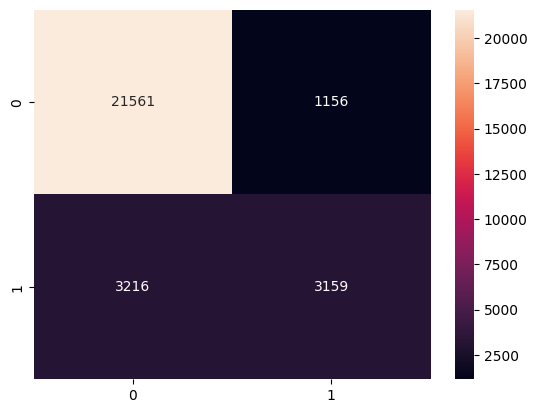

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()